In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df = pd.read_csv(r"C:\Users\jorda\OneDrive\Product_And_Order_Data.csv")
df = df.drop(columns=['column1','Order_Customer_Id.1','Order_City','Order_Id.1','Order_Item_Cardprod_Id.1','column1.1','column1.2','Category_Id','Category_Id.1','Product_Card_Id.1','Product_Category_Id.1','Department_Id','Order_Customer_Id','Order_Item_Cardprod_Id','Order_Item_Id','Order_Item_Id.1','Product_Card_Id','Product_Category_Id','Order_Status','Order_Zipcode','Type','Customer_Id', 'Order_Id','Product_Description','Product_Image','Product_Status'])

In [3]:
df

,Category_Name,Product_Name,Product_Price,Benefit_per_order,Order_Country,order_date_DateOrders,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Sales
0,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,-146.600006,Brasil,2015-05-27 02:56:00.0000000,0.000000,0.00,50.000000,-0.73,4,200.000000,-146.600006,South America,Marañón,200.000000
1,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,55.000000,Brasil,2015-05-27 02:56:00.0000000,50.000000,0.20,50.000000,0.28,5,200.000000,55.000000,South America,Marañón,250.000000
2,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,3.700000,Brasil,2015-05-27 02:56:00.0000000,8.000000,0.16,50.000000,0.09,1,42.000000,3.700000,South America,Marañón,50.000000
3,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,130.490005,Brasil,2015-05-27 02:56:00.0000000,52.000000,0.13,399.980011,0.38,1,347.980011,130.490005,South America,Marañón,399.980011
4,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.000000,46.270000,Brasil,2015-05-27 02:56:00.0000000,23.990000,0.12,49.980000,0.26,4,175.929993,46.270000,South America,Marañón,199.919998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639304,Men's Footwear,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,94.080002,Brasil,2015-05-26 22:02:00.0000000,64.000000,0.16,399.980011,0.28,1,335.980011,94.080002,South America,Santa Catarina,399.980011
639305,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,75.430000,Brasil,2015-05-26 22:02:00.0000000,16.799999,0.07,59.990002,0.34,4,223.160004,75.430000,South America,Santa Catarina,239.960007
639306,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,9.390000,Brasil,2015-05-26 22:02:00.0000000,5.200000,0.13,39.990002,0.27,1,34.790001,9.390000,South America,Santa Catarina,39.990002
639307,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,51.160000,Brasil,2015-05-26 22:02:00.0000000,23.400000,0.18,129.990005,0.48,1,106.589996,51.160000,South America,Santa Catarina,129.990005


In [4]:
region_orders= df[['Order_Region','Order_Profit_Per_Order']]
region_profits = region_orders.groupby(['Order_Region'])['Order_Profit_Per_Order'].sum()

In [5]:
region_profits

Order_Region
Canada             8.751849e+04
Caribbean          6.042092e+05
Central Africa     1.253475e+05
Central America    2.265367e+06
Central Asia       4.659860e+04
East Africa        1.580756e+05
East of USA        5.753054e+05
Eastern Asia       4.493787e+05
Eastern Europe     2.785085e+05
North Africa       2.441482e+05
Northern Europe    7.662016e+05
Oceania            6.408787e+05
South America      1.239976e+06
South Asia         5.309851e+05
South of  USA      3.139977e+05
Southeast Asia     6.235786e+05
Southern Africa    1.092624e+05
Southern Europe    7.911270e+05
US Center          4.573393e+05
West Africa        2.979063e+05
West Asia          4.340383e+05
West of USA        6.170773e+05
Western Europe     2.101580e+06
Name: Order_Profit_Per_Order, dtype: float64

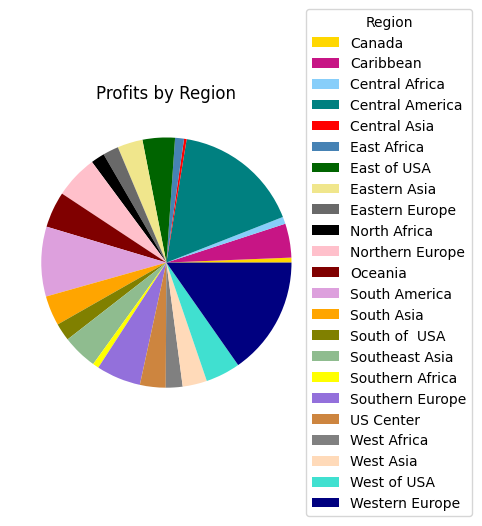

In [6]:
plt.pie(region_profits.values,colors = ['gold', 'mediumvioletred', 'lightskyblue', 'teal', 'red', 'steelblue', 'darkgreen', 'khaki', 'dimgrey', 'black', 'pink', 'maroon', 'plum', 'orange', 'olive', 'darkseagreen', 'yellow', 'mediumpurple', 'peru', 'grey', 'peachpuff', 'turquoise', 'navy'])
plt.legend(labels=region_profits.index,title = 'Region',loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Profits by Region')
plt.tight_layout()
plt.show()

In [7]:
product_type = df[['Category_Name','Order_Item_Quantity']]
total_product_quantity = product_type.groupby(['Category_Name'])['Order_Item_Quantity'].sum()
total_product_quantity= total_product_quantity.sort_values(ascending=False)

In [8]:
total_product_quantity

Category_Name
Cleats                  216202
Women's Apparel         185351
Indoor/Outdoor Games    171099
Men's Footwear          151921
Fishing                 118052
Cardio Equipment        110398
Water Sports            105236
Shop By Sport            95982
Camping & Hiking         93412
Electronics              28101
Accessories              15571
Golf Balls               13053
Girls' Apparel           10542
Golf Gloves               9047
Trade-In                  8407
Baseball & Softball       5570
Hockey                    5271
Golf Shoes                4390
Hunting & Shooting        4021
Boxing & MMA              3763
Golf Apparel              3521
Tennis & Racquet          3042
Lacrosse                  2925
Kids' Golf Clubs          2754
Fitness Accessories       2591
Men's Golf Clubs          1916
Women's Golf Clubs        1386
Soccer                    1074
Video Games                838
Strength Training          720
Children's Clothing        652
Women's Clothing         

<function matplotlib.pyplot.show(close=None, block=None)>

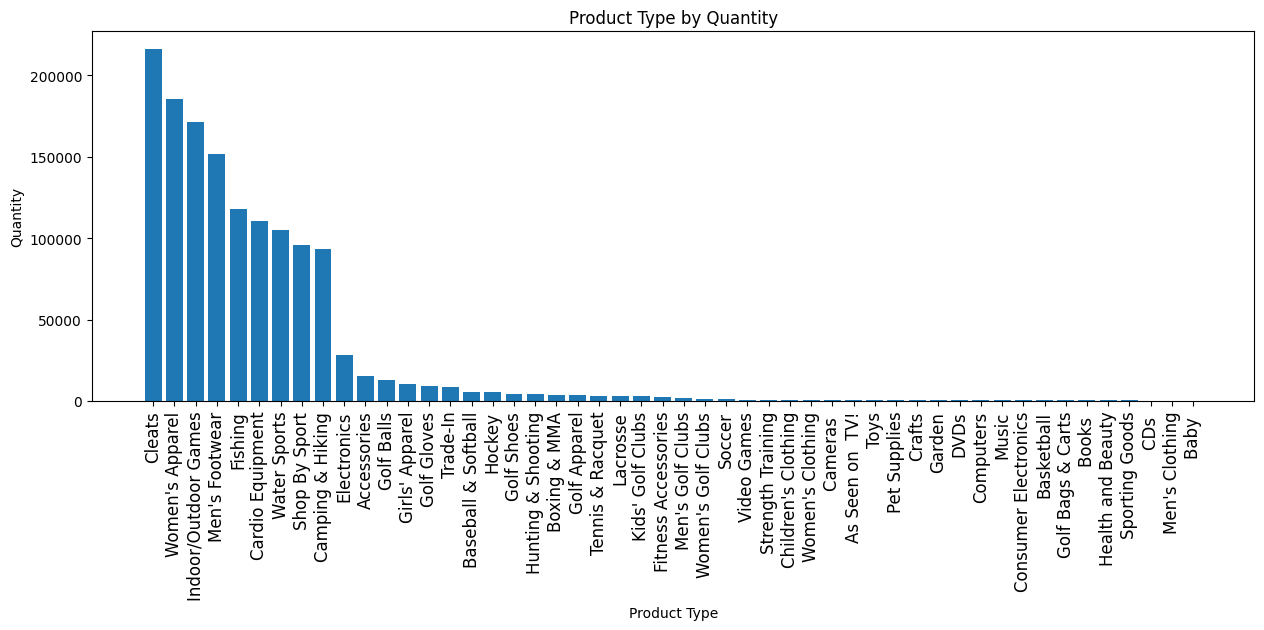

In [9]:
plt.figure().set_figwidth(15)
plt.bar(total_product_quantity.index, total_product_quantity.values)
plt.title("Product Type by Quantity")
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.xlabel('Product Type')
plt.show

In [10]:
df[['Order_Date','Order_Time']] = df['order_date_DateOrders'].str.split(' ',expand=True)
df[['Order_Year','Order_Month','Order_Day']] = df['Order_Date'].str.split('-',expand=True)
orders_dates = df[['Order_Date','Order_Year','Order_Month','Order_Day']]

In [11]:
orders_dates

,Order_Date,Order_Year,Order_Month,Order_Day
0,2015-05-27,2015,05,27
1,2015-05-27,2015,05,27
2,2015-05-27,2015,05,27
3,2015-05-27,2015,05,27
4,2015-05-27,2015,05,27
...,...,...,...,...
639304,2015-05-26,2015,05,26
639305,2015-05-26,2015,05,26
639306,2015-05-26,2015,05,26
639307,2015-05-26,2015,05,26


In [12]:
order_count_by_date = orders_dates.groupby(['Order_Date'])['Order_Date'].value_counts()
order_count_by_date= order_count_by_date.sort_index()
df2 = pd.DataFrame({'Date':order_count_by_date.index, 'Order_Count':order_count_by_date.values})
df2[['Order_Year','Order_Month','Order_Day']] = df2['Date'].str.split('-',expand=True)

In [13]:
df2

,Date,Order_Count,Order_Year,Order_Month,Order_Day
0,2015-01-01,606,2015,01,01
1,2015-01-02,552,2015,01,02
2,2015-01-03,655,2015,01,03
3,2015-01-04,709,2015,01,04
4,2015-01-05,558,2015,01,05
...,...,...,...,...,...
1122,2018-01-27,68,2018,01,27
1123,2018-01-28,69,2018,01,28
1124,2018-01-29,68,2018,01,29
1125,2018-01-30,69,2018,01,30


In [14]:
order_count_by_year = df2.groupby(['Order_Year'])['Order_Count'].sum()
order_count_by_year = order_count_by_year.drop('2018')

In [15]:
order_count_by_year

Order_Year
2015    229256
2016    229076
2017    178854
Name: Order_Count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

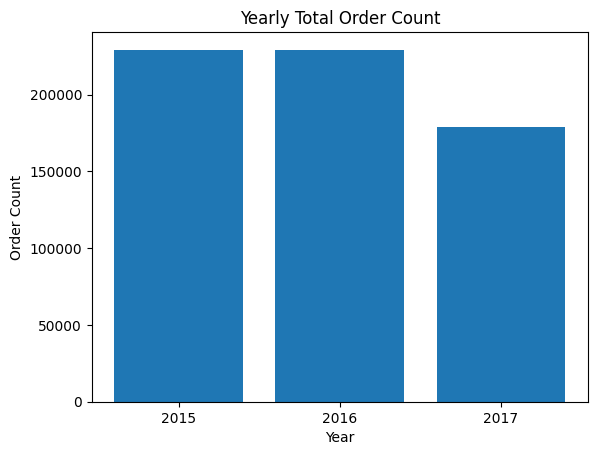

In [16]:
plt.bar(order_count_by_year.index, order_count_by_year.values)
plt.title("Yearly Total Order Count")
plt.ylabel('Order Count')
plt.xlabel('Year')
plt.show

In [17]:
df3 = df2.drop(df2[df2['Order_Year'] == '2016'].index)
df3 = df3.drop(df3[df3['Order_Year'] == '2017'].index)
df3 = df3.drop(df3[df3['Order_Year'] == '2018'].index)

In [18]:
df3

,Date,Order_Count,Order_Year,Order_Month,Order_Day
0,2015-01-01,606,2015,01,01
1,2015-01-02,552,2015,01,02
2,2015-01-03,655,2015,01,03
3,2015-01-04,709,2015,01,04
4,2015-01-05,558,2015,01,05
...,...,...,...,...,...
360,2015-12-27,760,2015,12,27
361,2015-12-28,595,2015,12,28
362,2015-12-29,628,2015,12,29
363,2015-12-30,654,2015,12,30


In [19]:
order_count_by_month = df3.groupby(['Order_Month'])['Order_Count'].sum()

In [20]:
order_count_by_month 

Order_Month
01    19338
02    17271
03    19700
04    18842
05    19623
06    18788
07    19395
08    19173
09    18946
10    19342
11    19231
12    19607
Name: Order_Count, dtype: int64

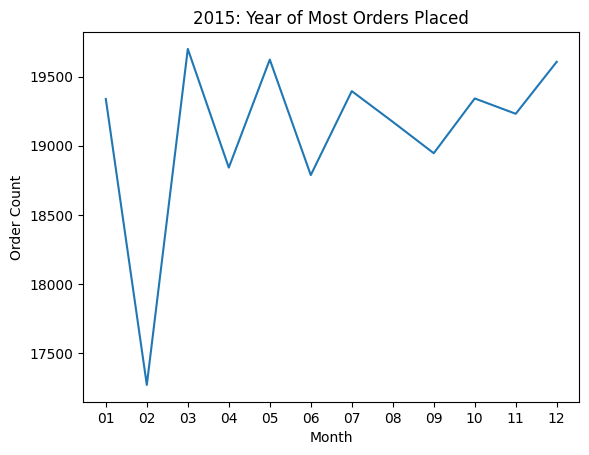

In [21]:
plt.plot(order_count_by_month.index, order_count_by_month.values) 
plt.xlabel("Month") 
plt.ylabel("Order Count") 
plt.title("2015: Year of Most Orders Placed")  
plt.show()

In [22]:
Y2015 = df[['Category_Name','Order_Item_Quantity','Order_Year','Order_Month','Order_Day']]
Y2015 = Y2015.drop(Y2015[Y2015['Order_Year'] == '2016'].index)
Y2015 = Y2015.drop(Y2015[Y2015['Order_Year'] == '2017'].index)
Y2015 = Y2015.drop(Y2015[Y2015['Order_Year'] == '2018'].index)
Y2015

,Category_Name,Order_Item_Quantity,Order_Year,Order_Month,Order_Day
0,Women's Apparel,4,2015,05,27
1,Women's Apparel,5,2015,05,27
2,Women's Apparel,1,2015,05,27
3,Women's Apparel,1,2015,05,27
4,Women's Apparel,4,2015,05,27
...,...,...,...,...,...
639304,Men's Footwear,1,2015,05,26
639305,Fishing,4,2015,05,26
639306,Fishing,1,2015,05,26
639307,Fishing,1,2015,05,26


In [23]:
monthly_product_quantity = Y2015.groupby(['Order_Month','Category_Name'])['Order_Item_Quantity'].sum()
monthly_product_quantity = monthly_product_quantity.groupby(level='Order_Month', group_keys=False).apply(lambda x: x.sort_values(ascending=False).head(5))
monthly_product_quantity = monthly_product_quantity.to_frame()

In [24]:
monthly_product_quantity

Order_Item_Quantity
Order_Month Category_Name                            
01          Cleats                               7099
            Indoor/Outdoor Games                 5559
            Women's Apparel                      5526
            Men's Footwear                       4232
            Fishing                              3736
02          Cleats                               5727
            Women's Apparel                      5254
            Indoor/Outdoor Games                 4655
            Men's Footwear                       4397
            Fishing                              3049
03          Cleats                               6965
            Women's Apparel                      6054
            Indoor/Outdoor Games                 5804
            Men's Footwear                       4241
            Fishing                              3736
04          Cleats                               6313
            Women's Apparel                      6032
            Indoor/Outdoor Games                 5217
            Men's Footwear                       4557
            Fishing                              3524
05          Cleats                               6623
            Women's Apparel                      5776
            Indoor/Outdoor Games                 5339
            Men's Footwear                       4337
            Cardio Equipment                     4115
06          Cleats                               6314
            Women's Apparel                      5132
            Indoor/Outdoor Games                 4949
            Men's Footwear                       4495
            Cardio Equipment                     3881
07          Cleats                               6681
            Women's Apparel                      6425
            Indoor/Outdoor Games                 5451
            Men's Footwear                       4543
            Fishing                              3599
08          Cleats                               7081
            Women's Apparel                      5734
            Indoor/Outdoor Games                 4620
            Men's Footwear                       4578
            Cardio Equipment                     3495
09          Cleats                               6427
            Women's Apparel                      5498
            Indoor/Outdoor Games                 5179
            Men's Footwear                       4804
            Cardio Equipment                     3379
10          Cleats                               6401
            Women's Apparel                      5783
            Indoor/Outdoor Games                 5230
            Men's Footwear                       4650
            Cardio Equipment                     3663
11          Cleats                               6482
            Indoor/Outdoor Games                 5338
            Women's Apparel                      5123
            Men's Footwear                       4568
            Fishing                              3708
12          Cleats                               6614
            Indoor/Outdoor Games                 5558
            Women's Apparel                      5474
            Men's Footwear                       4891
            Fishing                              3818

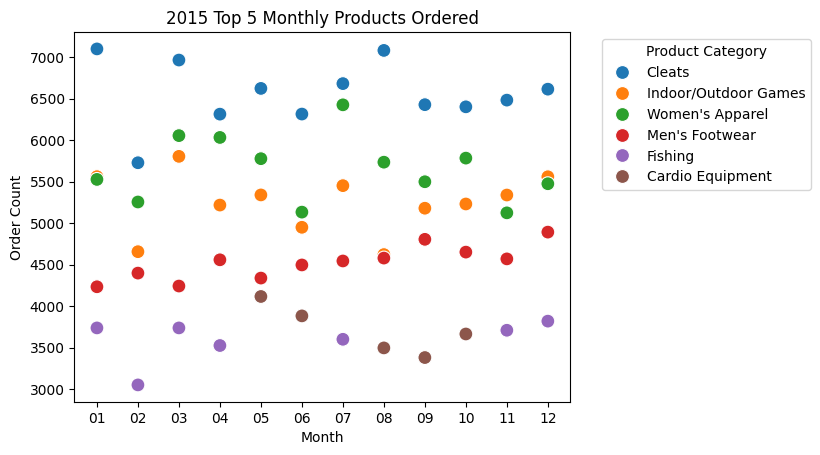

In [25]:
sns.scatterplot(data=monthly_product_quantity, x='Order_Month', y='Order_Item_Quantity', hue='Category_Name', palette='tab10', s=100)
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.title("2015 Top 5 Monthly Products Ordered")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()